In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

In [2]:
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

In [3]:
np.corrcoef(street, garage)[0, 1]

-1.0

Text(0, 0.5, 'Garage')

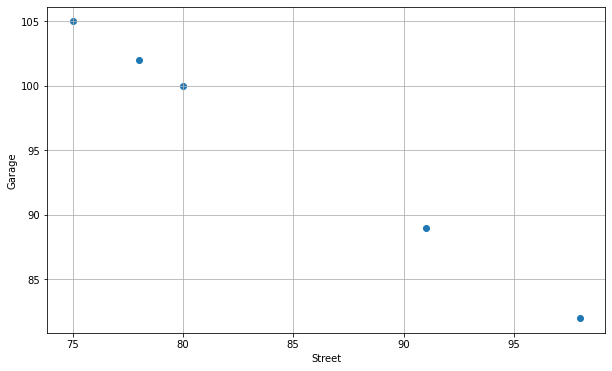

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = street, y = garage)
plt.grid(True)
plt.xlabel("Street")
plt.ylabel("Garage")

In [5]:
df = pd.read_csv("bitcoin.csv")

In [6]:
projection = 14
df['predict'] = df['close'].shift(-projection)

In [7]:
x = pd.DataFrame(df, columns=['close']) # подаём на вход модели
y = pd.DataFrame(df, columns=['predict']) # то, что хотим получить
x = np.array(x, type(float)) # Нормализация для нормального среза
y = np.array(y, type(float))

In [9]:
x = x[:-projection]
y = y[:-projection]

In [10]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

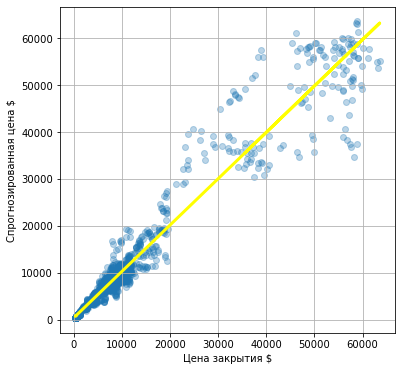

In [15]:
plt.figure(figsize=(6,6))
plt.grid(True)
plt.scatter(x, y, alpha=0.3)

plt.plot(x, model.predict(x), color='yellow', linewidth=3)
plt.xlabel('Цена закрытия $')
plt.ylabel('Спрогнозированная цена $')
plt.show()

In [16]:
model.coef_ # Угловой коэффициент линии регрессии

array([[0.98893729]])

In [19]:
math.degrees(math.atan(model.coef_)) # Угол наклона линии регрессии

44.681317350771

In [20]:
model.intercept_ # y-перехват

array([354.08558181])

In [21]:
model.predict(df[['close']][-projection:])

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[34582.76786095],
       [35622.15084671],
       [37232.3781069 ],
       [36631.77670928],
       [37515.36251368],
       [39149.75940135],
       [36807.79765831],
       [35499.33472412],
       [35756.62654   ],
       [33565.42828749],
       [33393.86744566],
       [37332.01353931],
       [36629.07691047],
       [36789.82866767]])

In [22]:
model.score(x, y)

0.9490624388820347